# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [73]:
import requests

url_get = requests.get ('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [74]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" c'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [75]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [76]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

Finding row length.

In [77]:
table = soup.find('table',attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:700])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="


In [78]:
table.find_all('th',attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [79]:
row = table.find_all('th',attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

547

Do the scrapping process here (please change this markdown with your explanation)

In [80]:
temp = [] #initiating a tuple

for i in range(0,row_length):
    #scrapping process
    Date = table.find_all('th',attrs={'class':'font-semibold text-center'})[i].text
    Date = Date.strip()
    
    Market_Cap = table.find_all('td',attrs={'class':'text-center'})[4*i].text
    Market_Cap = Market_Cap.strip()
    
    Volume = table.find_all('td',attrs={'class':'text-center'})[4*i+1].text
    Volume = Volume.strip()
    
    Open = table.find_all('td',attrs={'class':'text-center'})[4*i+2].text
    Open = Open.strip()
    
    Close = table.find_all('td',attrs={'class':'text-center'})[4*i+3].text
    Close = Close.strip()
    
    temp.append((Date, Market_Cap, Volume, Open, Close))

temp

[('2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06-19',
  '$260,

In [81]:
temp = temp[::-1]

## Creating data frame & Data wrangling

Put the array into dataframe

In [82]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Market_Cap', 'Volume', 'Open', 'Close'))
df.head()

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,"$14,097,451,632","$7,103,187,151",$129.19,$130.48
1,2020-01-02,"$14,230,588,104","$6,623,732,041",$130.48,$127.05
2,2020-01-03,"$13,859,793,330","$6,497,297,884",$127.05,$133.70
3,2020-01-04,"$14,613,194,776","$9,655,245,100",$133.70,$134.14
4,2020-01-05,"$14,636,213,160","$6,958,393,690",$134.14,$135.01


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

First step on the data wrangling step is to define the data type on each variable and then change it to the correct types. In order to convert the data type, do necessary data clean up to fit each data type conversion.

In [83]:
df.dtypes

Date          object
Market_Cap    object
Volume        object
Open          object
Close         object
dtype: object

In [84]:
df['Market_Cap']=df['Market_Cap'].str.replace('$','')
df['Market_Cap']=df['Market_Cap'].str.replace(',','')

df['Volume']=df['Volume'].str.replace('$','')
df['Volume']=df['Volume'].str.replace(',','')

df['Open']=df['Open'].str.replace('$','')
df['Open']=df['Open'].str.replace(',','')

df['Close']=df['Close'].str.replace('$','')
df['Close']=df['Close'].str.replace(',','')
df['Close']=df['Close'].str.replace('N/A','0')

df.head()

C:\Users\TANIAA~1\AppData\Local\Temp/ipykernel_12384/2277586106.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Market_Cap']=df['Market_Cap'].str.replace('$','')
C:\Users\TANIAA~1\AppData\Local\Temp/ipykernel_12384/2277586106.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Volume']=df['Volume'].str.replace('$','')
C:\Users\TANIAA~1\AppData\Local\Temp/ipykernel_12384/2277586106.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Open']=df['Open'].str.replace('$','')
C:\Users\TANIAA~1\AppData\Local\Temp/ip

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,14097451632,7103187151,129.19,130.48
1,2020-01-02,14230588104,6623732041,130.48,127.05
2,2020-01-03,13859793330,6497297884,127.05,133.70
3,2020-01-04,14613194776,9655245100,133.70,134.14
4,2020-01-05,14636213160,6958393690,134.14,135.01


In [85]:
df['Date']=df['Date'].astype('datetime64')
df['Market_Cap']=df['Market_Cap'].astype('int64')
df['Volume']=df['Volume'].astype('int64')
df['Open']=df['Open'].astype('float64')
df['Close']=df['Close'].astype('float64')

df.head()

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,14097451632,7103187151,129.19,130.48
1,2020-01-02,14230588104,6623732041,130.48,127.05
2,2020-01-03,13859793330,6497297884,127.05,133.70
3,2020-01-04,14613194776,9655245100,133.70,134.14
4,2020-01-05,14636213160,6958393690,134.14,135.01


For easier Data visualisation, set the date variable as data frame index and then make simple chart by using plot

In [86]:
df = df.set_index('Date')
df.head()

,Market_Cap,Volume,Open,Close
Date,,,,
2020-01-01,14097451632,7103187151,129.19,130.48
2020-01-02,14230588104,6623732041,130.48,127.05
2020-01-03,13859793330,6497297884,127.05,133.70
2020-01-04,14613194776,9655245100,133.70,134.14
2020-01-05,14636213160,6958393690,134.14,135.01


In [69]:
df.sort_values('Volume', ascending=False)

,Market_Cap,Volume,Open,Close
Date,,,,
2021-01-04,112525376105,140906534191,967.00,1025.65
2021-05-20,295232973802,117905041184,2505.01,2778.28
2021-05-22,279623071719,115000901892,2419.10,2306.37
2021-05-23,268503273693,102524751568,2306.37,2120.04
2021-05-14,431105320829,97383442023,3750.34,4088.73
...,...,...,...,...
2020-07-20,26715274452,4452847140,238.90,236.06
2020-07-03,25284990220,4427853855,226.57,225.18
2020-07-12,26712364780,4350900774,239.10,241.77


<AxesSubplot:xlabel='Date'>

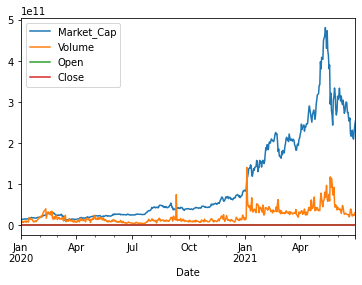

In [88]:
df.plot()

<AxesSubplot:xlabel='Date'>

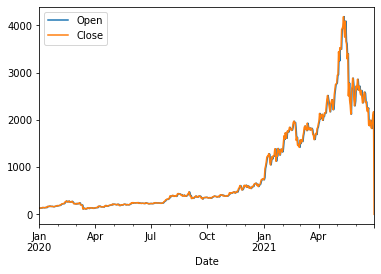

In [89]:
df[['Open','Close']].plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Date'>

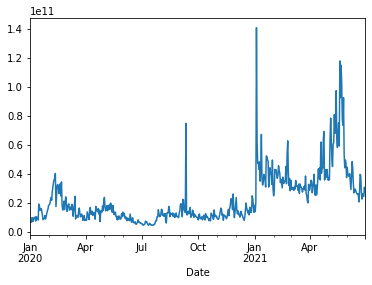

In [90]:
df['Volume'].plot()

In [91]:
df['Volume'].mean()

22445152287.500916


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.